In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
df_er = pd.read_excel ('./Data_COMP5212project.xlsx', sheet_name='ER')
print (df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [3]:
df_er['ER_datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [4]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [5]:
df_er=df_er.drop(columns='Date')

In [6]:
df_var = pd.read_excel ('Data_COMP5212project.xlsx', sheet_name='Variables')
df_var['DLTINT_USEA'] = df_var['LTINT_USA'] - df_var['LTINT_EA19']

In [7]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,...,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,...,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,...,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,...,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,...,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,...,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [8]:
df_var['Var_datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,...,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Var_datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,...,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,...,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,...,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,...,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,...,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01


In [9]:
df_var=df_var.drop(columns='Date')

In [10]:
df_var["Current_EUR_USD"] = df_er["EUR_USD"].copy()
df_var = df_var[:-1]
df_er = df_er[1:].reset_index(drop=True)
df_all = df_var.copy()
df_all[df_er.columns] = df_er

In [11]:
#df_all=df_er.set_index('datetime',drop=False).join(df_var.set_index('datetime')) 

In [12]:
df_all.head()

,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,...,Var_datetime,Current_EUR_USD,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,...,1999-01-01,1.1366,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
1,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,...,1999-02-01,1.1025,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
2,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,...,1999-03-01,1.0770,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
3,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,...,1999-04-01,1.0570,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01
4,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,...,1999-05-01,1.0423,8.2787,121.04,1.0357,1.4623,0.6683,1.5480,1.5775,1999-06-01


In [13]:
df_all.to_csv("df_all.csv",index=False) ##Export the data for future use

In [14]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19', 'DLTINT_USEA', 'Current_EUR_USD']]

In [15]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
0,1.1025,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220,0.8980,1.1366
1,1.0770,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742,1.0258,1.1025
2,1.0570,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810,1.0490,1.0770
3,1.0423,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407,1.1393,1.0570
4,1.0357,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049,1.3351,1.0423


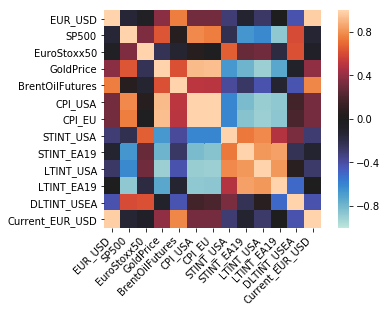

In [16]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
usdeu_x_train.head(5)

,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
117,968.75,2591.76,716.8,65.32,91.37446,91.35,4.32,5.1131,3.81,4.4158,-0.6058,1.2733
80,1228.81,3428.51,469.0,63.48,83.87584,84.06,3.87,2.1391,4.20,3.1555,1.0445,1.2030
86,1294.83,3853.74,581.8,65.91,84.29775,84.79,4.88,2.7226,4.72,3.7312,0.9888,1.2119
116,1166.36,3038.20,874.2,98.17,92.30688,91.28,3.59,5.0192,3.69,4.5043,-0.8143,1.4104
112,1400.38,3777.85,887.3,127.78,91.39935,90.96,2.66,4.8574,3.88,4.4233,-0.5433,1.5554


In [19]:
usdeu_x_test.head(5)

,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
68,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432
136,1089.41,2610.26,1212.2,74.65,92.05163,93.18,0.45,0.6865,3.42,3.6821,-0.2621,1.2306
89,1270.20,3648.92,613.5,73.51,85.60567,85.67,5.35,2.9857,5.11,4.0751,1.0349,1.2789
61,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490
243,2945.83,3514.62,1340.4,72.80,107.81840,105.26,2.47,-0.3105,2.53,0.9510,1.5790,1.1217


In [20]:
usdeu_y_train.head(5)

117    1.2698
80     1.1988
86     1.2637
116    1.2733
112    1.5756
Name: EUR_USD, dtype: float64

In [21]:
usdeu_y_test.head(5)

68     1.2785
136    1.2236
89     1.2763
61     1.2315
243    1.1169
Name: EUR_USD, dtype: float64

Mean Absolute Error: 0.03 degrees.
MAE: 0.02619066020408164
MSE: 0.0012219809159460433
RMSE: 0.03495684362104284
R-squared:  0.9154777707271272
Accuracy: 97.94 %.


Text(0, 0.5, 'Predictions')

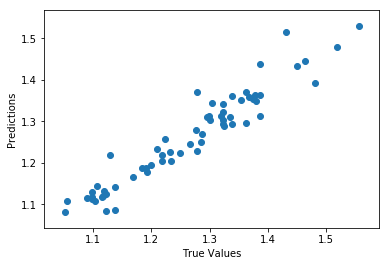

In [22]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = regressor.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [23]:
import xgboost as xgb

Mean Absolute Error: 0.03 degrees.
MAE: 0.030073916386801115
MSE: 0.001511826128346071
RMSE: 0.03888220837794673
R-squared:  0.9164644859141658
Accuracy: 97.63 %.


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Predictions')

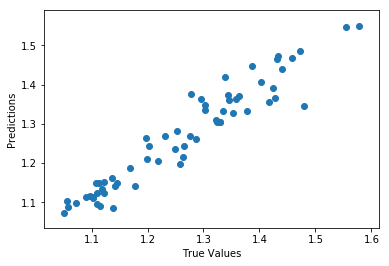

In [24]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3)

xgb_reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### XGBoost with opt

Mean Absolute Error: 0.02 degrees.
MAE: 0.022479404370746935
MSE: 0.0009425729277885877
RMSE: 0.03070135058574114
R-squared:  0.9425232656607232
Accuracy: 98.23 %.


Text(0, 0.5, 'Predictions')

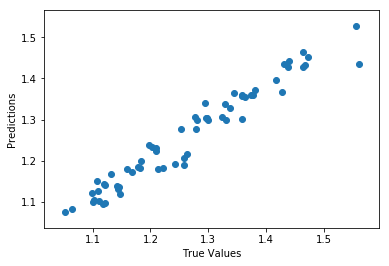

In [25]:
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=15)

xgb_reg = xgb.XGBRegressor(n_estimators=2000, 
                               max_depth=3,
                               learning_rate=0.1,
                               reg_alpha=0.3,
                               reg_lambda=0.3,
                               subsample=0.6,
                               random_state=38)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### Tuning HyperParameter

In [26]:
import random
import time
start=time.time()
require_time = 600
acc_list = []
param_list = []
while True:
    param = [random.randint(2,10),
             random.choice([1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]),
             random.choice(['gbtree']),
             random.randint(1,10)/10.0,
             random.randint(1,10)/10.0,
             random.randint(5,10)/10.0,
             random.randint(1,100),
             random.choice([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]),
             random.randint(1,100)]
        
    xgb_reg = xgb.XGBRegressor(n_estimators=param[7], 
                               max_depth=param[0],
                               learning_rate=param[1],
                               booster=param[2],
                               reg_alpha=param[3],
                               reg_lambda=param[4],
                               subsample=param[5],
                               random_state=param[6])
    usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=param[8])
    xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

    # Use the forest's predict method on the test data
    predictions = xgb_reg.predict(usdeu_x_test)
    # Calculate the absolute errors
    errors = abs(predictions - usdeu_y_test)
    # Print out the mean absolute error (mae)


    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / usdeu_y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    acc_list.append(accuracy)
    param_list.append(param)
    if accuracy>98.:
        print('Accuracy:', round(accuracy, 2), '%.', param)
    
    used_time = time.time() - start
    if used_time>require_time:
        break
max_acc = max(acc_list)

print('Accuracy:', max_acc, '%.', param_list[acc_list.index(max_acc)])

Accuracy: 98.15 %. [10, 0.05, 'gbtree', 0.5, 0.6, 0.8, 98, 3000, 15]
Accuracy: 98.06 %. [10, 0.05, 'gbtree', 0.3, 0.6, 0.5, 32, 3000, 32]
Accuracy: 98.25 %. [2, 0.005, 'gbtree', 0.2, 0.1, 0.5, 94, 3000, 74]
Accuracy: 98.05 %. [2, 0.005, 'gbtree', 0.2, 1.0, 0.7, 9, 2500, 59]
Accuracy: 98.24 %. [10, 0.01, 'gbtree', 0.4, 0.5, 0.7, 71, 1500, 76]
Accuracy: 98.04 %. [5, 0.1, 'gbtree', 0.5, 0.8, 0.6, 3, 3500, 54]
Accuracy: 98.01 %. [9, 0.05, 'gbtree', 0.1, 0.1, 0.8, 79, 1000, 71]
Accuracy: 98.05 %. [6, 0.01, 'gbtree', 0.1, 0.4, 1.0, 30, 500, 74]
Accuracy: 98.06 %. [3, 0.01, 'gbtree', 0.2, 1.0, 0.8, 42, 3500, 23]
Accuracy: 98.12 %. [5, 0.05, 'gbtree', 0.8, 0.7, 0.7, 72, 4000, 37]
Accuracy: 98.26 %. [3, 0.05, 'gbtree', 0.7, 0.2, 1.0, 90, 3500, 81]
Accuracy: 98.06 %. [5, 0.01, 'gbtree', 0.3, 0.1, 1.0, 18, 3500, 32]
Accuracy: 98.22 %. [8, 0.01, 'gbtree', 0.1, 0.4, 0.6, 5, 2000, 72]
Accuracy: 98.0 %. [3, 0.01, 'gbtree', 0.8, 0.6, 0.5, 89, 1000, 37]
Accuracy: 98.15 %. [7, 0.05, 'gbtree', 0.1, 0.6, 

Accuracy: 98.17 %. [3, 0.005, 'gbtree', 0.3, 0.7, 1.0, 72, 3500, 100]
Accuracy: 98.03 %. [3, 0.01, 'gbtree', 0.1, 1.0, 0.7, 100, 1000, 92]
Accuracy: 98.12 %. [7, 0.1, 'gbtree', 0.7, 0.4, 0.9, 76, 2000, 35]
Accuracy: 98.06 %. [4, 0.001, 'gbtree', 0.1, 0.9, 0.7, 69, 4000, 32]
Accuracy: 98.04 %. [4, 0.1, 'gbtree', 1.0, 1.0, 0.6, 45, 2500, 81]
Accuracy: 98.07 %. [10, 0.005, 'gbtree', 0.3, 1.0, 0.6, 70, 3500, 17]
Accuracy: 98.15 %. [9, 0.1, 'gbtree', 0.4, 0.2, 0.5, 57, 3500, 71]
Accuracy: 98.01 %. [9, 0.1, 'gbtree', 0.9, 0.2, 0.5, 61, 500, 100]
Accuracy: 98.23 %. [6, 0.1, 'gbtree', 0.6, 0.1, 1.0, 86, 3500, 76]
Accuracy: 98.0 %. [3, 0.1, 'gbtree', 0.1, 0.3, 0.9, 31, 4000, 53]
Accuracy: 98.09 %. [9, 0.1, 'gbtree', 1.0, 0.1, 0.7, 76, 4000, 76]
Accuracy: 98.07 %. [10, 0.01, 'gbtree', 0.1, 0.7, 1.0, 1, 2000, 94]
Accuracy: 98.03 %. [2, 0.01, 'gbtree', 0.9, 1.0, 0.6, 1, 3000, 87]
Accuracy: 98.13 %. [7, 0.1, 'gbtree', 0.6, 0.4, 0.8, 6, 1000, 1]
Accuracy: 98.16 %. [5, 0.01, 'gbtree', 0.6, 1.0, 0.8, 

Mean Absolute Error: 0.02 degrees.
MAE: 0.023961854867535343
MSE: 0.0010184191040815468
RMSE: 0.031912679362309064
R-squared:  0.9467334259359202
Accuracy: 98.15 %.


Text(0, 0.5, 'Predictions')

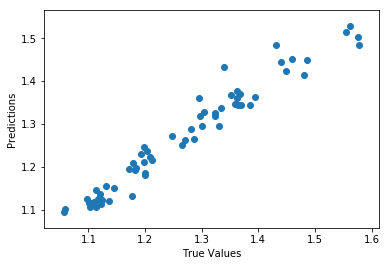

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = lin_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")